### 📈 Curvature Optimization

Once the spline is built:
- You must **replace the assumed boundary conditions** (like natural spline: second derivative = 0 at endpoints).
- Your goal is to **optimize** the spline such that the **total curvature is minimized**.
- This will result in a **smoother path**—which is desirable for autonomous vehicle trajectory planning.


### 🔍 What does Optimization mean here?
There are 3 parts to an optimization problem:
- Objective (or Cost) Function :
This is the function you want to minimize or maximize.
- Parameters (or Decision Variables):
These are the variables you are allowed to change in order to achieve the best value of the objective.
- Constraints:
These are the rules or limits that the parameters and/or the solution must satisfy.
In general, optimization means adjusting parameters to minimize or maximize an objective — like reducing cost, increasing speed, or in our case: minimizing curvature.

Here, you are given 4 fixed waypoints. Your goal is to interpolate these points using cubic splines, but with a twist:

refer to the first 3 videos of the following playlist for a better understanding:
[Video: Introduction to Curve Optimization](https://youtube.com/playlist?list=PLLK3oSbvdxFdF67yVxF_1FQO9SbBY3yTL&si=EMnkQ3Gb_EleDISu)

---
## 🎯 PROBLEM STATEMENT
You are given 4 discrete waypoints from the previous section. Your task is to interpolate these points using **cubic spline interpolation**, but with a focus on **optimizing the shape of the curve**.

Essentially, you are required to **minimize the total curvature** of the resulting spline by **varying the second derivative values at the boundaries**. This should be done **without using inbuilt spline functions** from libraries such as `scipy`. The goal is to find the **smoothest possible path** through the points, which would represent the **ideal trajectory** for a vehicle to follow. You may choose suitable bounds for the second derivative values and iterate through different combinations of boundary conditions to determine the configuration that leads to the **minimum total curvature**.

---

## Curvature Formula

The **curvature** $\kappa(t)$ of a 2D parametric curve $(x(t), y(t))$ is given by:

$$
\kappa(t) = \frac{ |x'(t)y''(t) - y'(t)x''(t)| }{ \left( (x'(t))^2 + (y'(t))^2 \right)^{3/2} }
$$

Where:
- $x'(t)$ and $y'(t)$ are the **first derivatives** with respect to the parameter $t$
- $x''(t)$ and $y''(t)$ are the **second derivatives**

---

## 📌 Deliverables

1. Your own implementation of cubic spline interpolation.
2. Plots of:
   - Original points
   - Interpolated spline without optimization
   - Interpolated spline with optimization
---

### 🌟 Optional Assignement

You may notice that directly finding the smoothest curve through waypoints seems inefficient and computationally expensive. Fortunately, mathematicians have developed robust optimization techniques that are readily available through libraries like `scipy.optimize`.

In this task, try enhancing the **cubic interpolation curve** you obtained earlier by finding an **optimal trajectory through the waypoints** — one that minimizes the curvature at every interpolated point. To do this, you can treat the **second derivatives at the curve’s boundaries** as variables to be optimized. Use `scipy` functions to perform this optimization and compare the resulting smooth curve to the original interpolation.

However, you may not notice an appreciable reduction in sharpness and a smoother, more natural path. What else can be done then for the **optimal raceline** for our car?

---

**Good luck!**  Let the paths be smooth and the math be satisfying!

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def derivative(x,y):
    return np.diff(y)/np.diff(x)
def derivative2(x,der):
    return np.diff(der)/np.diff(x[:-1])
def curvature(x,y):
    return abs(derivative2(x,derivative(x,y)))/((1+derivative(x,y)**2)**1.5)[:-1]
def S1(x,coeffs):
    s=0
    for i in range(0,4):
       s+=coeffs[i]*x**(3-i)
    return s 
def S2(x,coeffs):
    s=0
    for i in range(4,8):
       s+=coeffs[i]*x**((3-i)%4)
    return s 
def S3(x,coeffs):
    s=0
    for i in range(8,12):
       s+=coeffs[i]*x**((11-i)%4)
    return s



In [45]:
x=[]
y=[]
valuex=np.array(list(eval(input("enter x values"))))
valuey=np.array(list(eval(input("enter y values"))))

In [46]:
variables=' [a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3]'
matrix = np.zeros((12, 12))
print(variables+"\n", matrix)

 [a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3]
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
def cubicspline(x, y, v1, v2):
    matrix = np.zeros((12, 12))

    for i in range(4):
        matrix[0][i] = x[0]**(3 - i)
        matrix[1][i] = x[1]**(3 - i)
        matrix[2][i + 4] = x[1]**(3 - i)
        matrix[3][i + 4] = x[2]**(3 - i)
        matrix[4][i + 8] = x[2]**(3 - i)
        matrix[5][i + 8] = x[3]**(3 - i)

        if 2 - i >= 0:
            matrix[6][i] = (3 - i) * x[1]**(2 - i)
            matrix[6][i + 4] = -(3 - i) * x[1]**(2 - i)
            matrix[8][i + 4] = (3 - i) * x[2]**(2 - i)
            matrix[8][i + 8] = -(3 - i) * x[2]**(2 - i)

        if 1 - i >= 0:
            matrix[7][i] = (3 - i) * (2 - i) * x[1]**(1 - i)
            matrix[7][i + 4] = -(3 - i) * (2 - i) * x[1]**(1 - i)
            matrix[9][i + 4] = (3 - i) * (2 - i) * x[2]**(1 - i)
            matrix[9][i + 8] = -(3 - i) * (2 - i) * x[2]**(1 - i)

    # Boundary conditions at the endpoints
    matrix[10][0] = 6 * x[0]
    matrix[10][1] = 2

    matrix[11][8] = 6 * x[3]
    matrix[11][9] = 2    

    rhs = np.zeros(12)
    rhs[0] = y[0]
    rhs[5] = y[3]
    rhs[1] = rhs[2] = y[1]
    rhs[3] = rhs[4] = y[2]
    rhs[10] = v1
    rhs[11] = v2

    coeffs = np.linalg.solve(matrix, rhs)

    x1 = np.linspace(x[0], x[1], 100)
    x2 = np.linspace(x[1], x[2], 100)
    x3 = np.linspace(x[2], x[3], 100)

    y1 = S1(x1, coeffs)
    y2 = S2(x2, coeffs)
    y3 = S3(x3, coeffs)

    x = np.concatenate((x1[:-1], x2[:-1], x3))
    y = np.concatenate((y1[:-1], y2[:-1], y3))  
    return x, y

In [ ]:
learning_rate = 3
a=b=0
eps=1e-5
loss=float('inf')
for i in range(1000):
    x, y = cubicspline(valuex, valuey, a, b)
    prev_loss=loss
    loss = np.sum(curvature(x, y))

    if prev_loss<loss: 
        learning_rate/=3         #if we are worsening then decrease the learning rate
        continue
    
    if (i%10==0): print (loss)   

    # Gradient wrt a
    x_eps_a, y_eps_a = cubicspline(valuex, valuey, a + eps, b)
    loss_a = np.sum(curvature(x_eps_a, y_eps_a))
    grad_a = (loss_a - loss) / eps

    # Gradient wrt b
    x_eps_b, y_eps_b = cubicspline(valuex, valuey, a, b + eps)
    loss_b = np.sum(curvature(x_eps_b, y_eps_b))
    grad_b = (loss_b - loss) / eps

    a -= learning_rate * grad_a
    b -= learning_rate * grad_b   

436.89981859843124
434.9564272637117
434.7793706433024
434.5946986856021
434.39992667739295
434.1950551440762
433.9785579376095
433.7490559423634
433.50558163340105
433.2486952372626
432.98108633634126
432.6996382914824
432.39508497933485
432.07096175868503
431.8634648083209
431.65123079577245
431.53275801197935
431.41175352030274
431.28808280923255
431.16177656795287
431.03266857664164
430.9012032785695
430.7676872742836
430.6317580060002
430.49522751373735
430.3529464051037
430.2104165023807
430.0651103696712
429.9148768120683
429.7638035675499
429.61003636705493
429.45416156533054
429.29522162943834
429.13391334392173
428.9693960548701
428.80160337660976
428.6307111275753
428.4581520592592
428.2830089501554
428.106594104753
427.9300163253124
427.7473575142799
427.5665405491371
427.38000481915014
427.1949809169834
427.0083919413784
426.8212495995931
426.6327649065752
426.4442365075025
426.2561761281994
426.06915920449853
425.8861763469549
425.7019797623417
425.523526268209
425.343390

[ 2.84217094e-13 -8.41287831e-03 -1.66735174e-02 -2.47813157e-02
 -3.27356715e-02 -4.05359833e-02 -4.81816494e-02 -5.56720682e-02
 -6.30066381e-02 -7.01847575e-02 -7.72058248e-02 -8.40692384e-02
 -9.07743965e-02 -9.73206978e-02 -1.03707540e-01 -1.09934323e-01
 -1.16000444e-01 -1.21905301e-01 -1.27648293e-01 -1.33228818e-01
 -1.38646276e-01 -1.43900063e-01 -1.48989579e-01 -1.53914222e-01
 -1.58673390e-01 -1.63266482e-01 -1.67692895e-01 -1.71952030e-01
 -1.76043283e-01 -1.79966053e-01 -1.83719739e-01 -1.87303739e-01
 -1.90717451e-01 -1.93960274e-01 -1.97031606e-01 -1.99930846e-01
 -2.02657391e-01 -2.05210641e-01 -2.07589994e-01 -2.09794848e-01
 -2.11824601e-01 -2.13678652e-01 -2.15356399e-01 -2.16857241e-01
 -2.18180575e-01 -2.19325802e-01 -2.20292318e-01 -2.21079522e-01
 -2.21686812e-01 -2.22113588e-01 -2.22359247e-01 -2.22423188e-01
 -2.22304808e-01 -2.22003508e-01 -2.21518684e-01 -2.20849735e-01
 -2.19996060e-01 -2.18957057e-01 -2.17732125e-01 -2.16320661e-01
 -2.14722064e-01 -2.12935

<function matplotlib.pyplot.show(close=None, block=None)>

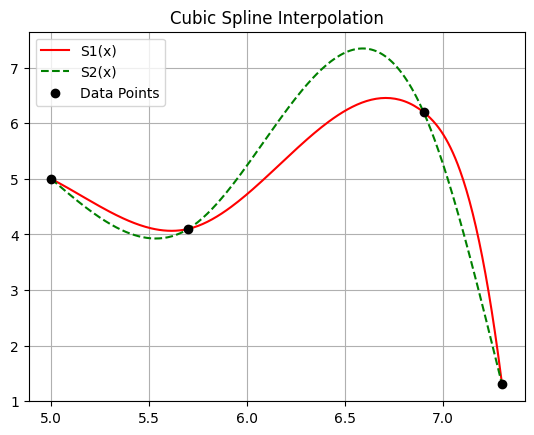

In [130]:
x2,y2=cubicspline(valuex,valuey,0,0)
print(y2-y)
print ("original curvature sum:", np.sum(curvature(x2,y2)), "\n")
print ("new curvature sum:", np.sum(curvature(x,y)), "\n")
plt.plot(x, y, label='S1(x)', color='red')
plt.plot(x2, y2, linestyle='--', label='S2(x)', color='green')

plt.scatter(valuex, valuey, color='black', zorder=5, label='Data Points')
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.grid (True)
plt.show